In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from IPython.display import Image
#from sklearn.model_selection import KFold
#from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score

import missingno as msno


In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

mpl.rc('font', family = 'D2coding')
mpl.rc('axes', unicode_minus=False)

sns.set(font="malgun gothic", rc={"axes.unicode_minus":False}, style='darkgrid')
plt.rc('figure', figsize=( 10, 8))

warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('C:/k_digital/source/Machine Learning with Python/ML project/oil/train.csv')
test = pd.read_csv('C:/k_digital/source/Machine Learning with Python/ML project/oil/test.csv')

In [4]:
data['FOPTIMETHGLY'].value_counts()

0.0     1954
1.0     1834
2.0       90
3.0        8
13.0       1
7.0        1
5.0        1
10.0       1
Name: FOPTIMETHGLY, dtype: int64

# 데이터 유형 확인

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14095 entries, 0 to 14094
Data columns (total 54 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   14095 non-null  object 
 1   COMPONENT_ARBITRARY  14095 non-null  object 
 2   ANONYMOUS_1          14095 non-null  int64  
 3   YEAR                 14095 non-null  int64  
 4   SAMPLE_TRANSFER_DAY  14095 non-null  int64  
 5   ANONYMOUS_2          14095 non-null  int64  
 6   AG                   14095 non-null  int64  
 7   AL                   14095 non-null  int64  
 8   B                    14095 non-null  int64  
 9   BA                   14095 non-null  int64  
 10  BE                   14095 non-null  int64  
 11  CA                   14095 non-null  int64  
 12  CD                   12701 non-null  float64
 13  CO                   14095 non-null  int64  
 14  CR                   14095 non-null  int64  
 15  CU                   14095 non-null 

# profiling

In [6]:
#!pip install pandas_profiling

import pandas_profiling
profile_report = pandas_profiling.ProfileReport(data)
profile_report

# 결측치 확인
- U를 2개의 그룹으로 합친 다음에 결측치를 0으로 대체 
- 결측치 0으로 바꾸기

In [7]:
# 비율로 확인 
missing_value = data.isna().sum()
total = data.shape[0]
ratio = round(missing_value/total,2)
print(round(missing_value/total,2))
ratio.sort_values(ascending=False).head(17).index
#  ['U4', 'U6', 'U14', 'U20', 'U50', 'U100', 'U75', 'U25', 'V100', 'FH2O',
#        'FOXID', 'FUEL', 'FOPTIMETHGLY', 'FSO4', 'FTBN', 'SOOTPERCENTAGE',
#        'FNOX'] --> 결측치 70% 이상 

ID                     0.00
COMPONENT_ARBITRARY    0.00
ANONYMOUS_1            0.00
YEAR                   0.00
SAMPLE_TRANSFER_DAY    0.00
ANONYMOUS_2            0.00
AG                     0.00
AL                     0.00
B                      0.00
BA                     0.00
BE                     0.00
CA                     0.00
CD                     0.10
CO                     0.00
CR                     0.00
CU                     0.00
FH2O                   0.72
FNOX                   0.72
FOPTIMETHGLY           0.72
FOXID                  0.72
FSO4                   0.72
FTBN                   0.72
FE                     0.00
FUEL                   0.72
H2O                    0.00
K                      0.16
LI                     0.00
MG                     0.00
MN                     0.00
MO                     0.00
NA                     0.00
NI                     0.00
P                      0.00
PB                     0.00
PQINDEX                0.00
S                   

Index(['U4', 'U6', 'U14', 'U20', 'U50', 'U100', 'U75', 'U25', 'V100', 'FH2O',
       'FOXID', 'FUEL', 'FOPTIMETHGLY', 'FSO4', 'FTBN', 'SOOTPERCENTAGE',
       'FNOX'],
      dtype='object')

In [8]:
data['FOPTIMETHGLY'].value_counts()

0.0     1954
1.0     1834
2.0       90
3.0        8
13.0       1
7.0        1
5.0        1
10.0       1
Name: FOPTIMETHGLY, dtype: int64

<Figure size 720x1080 with 0 Axes>

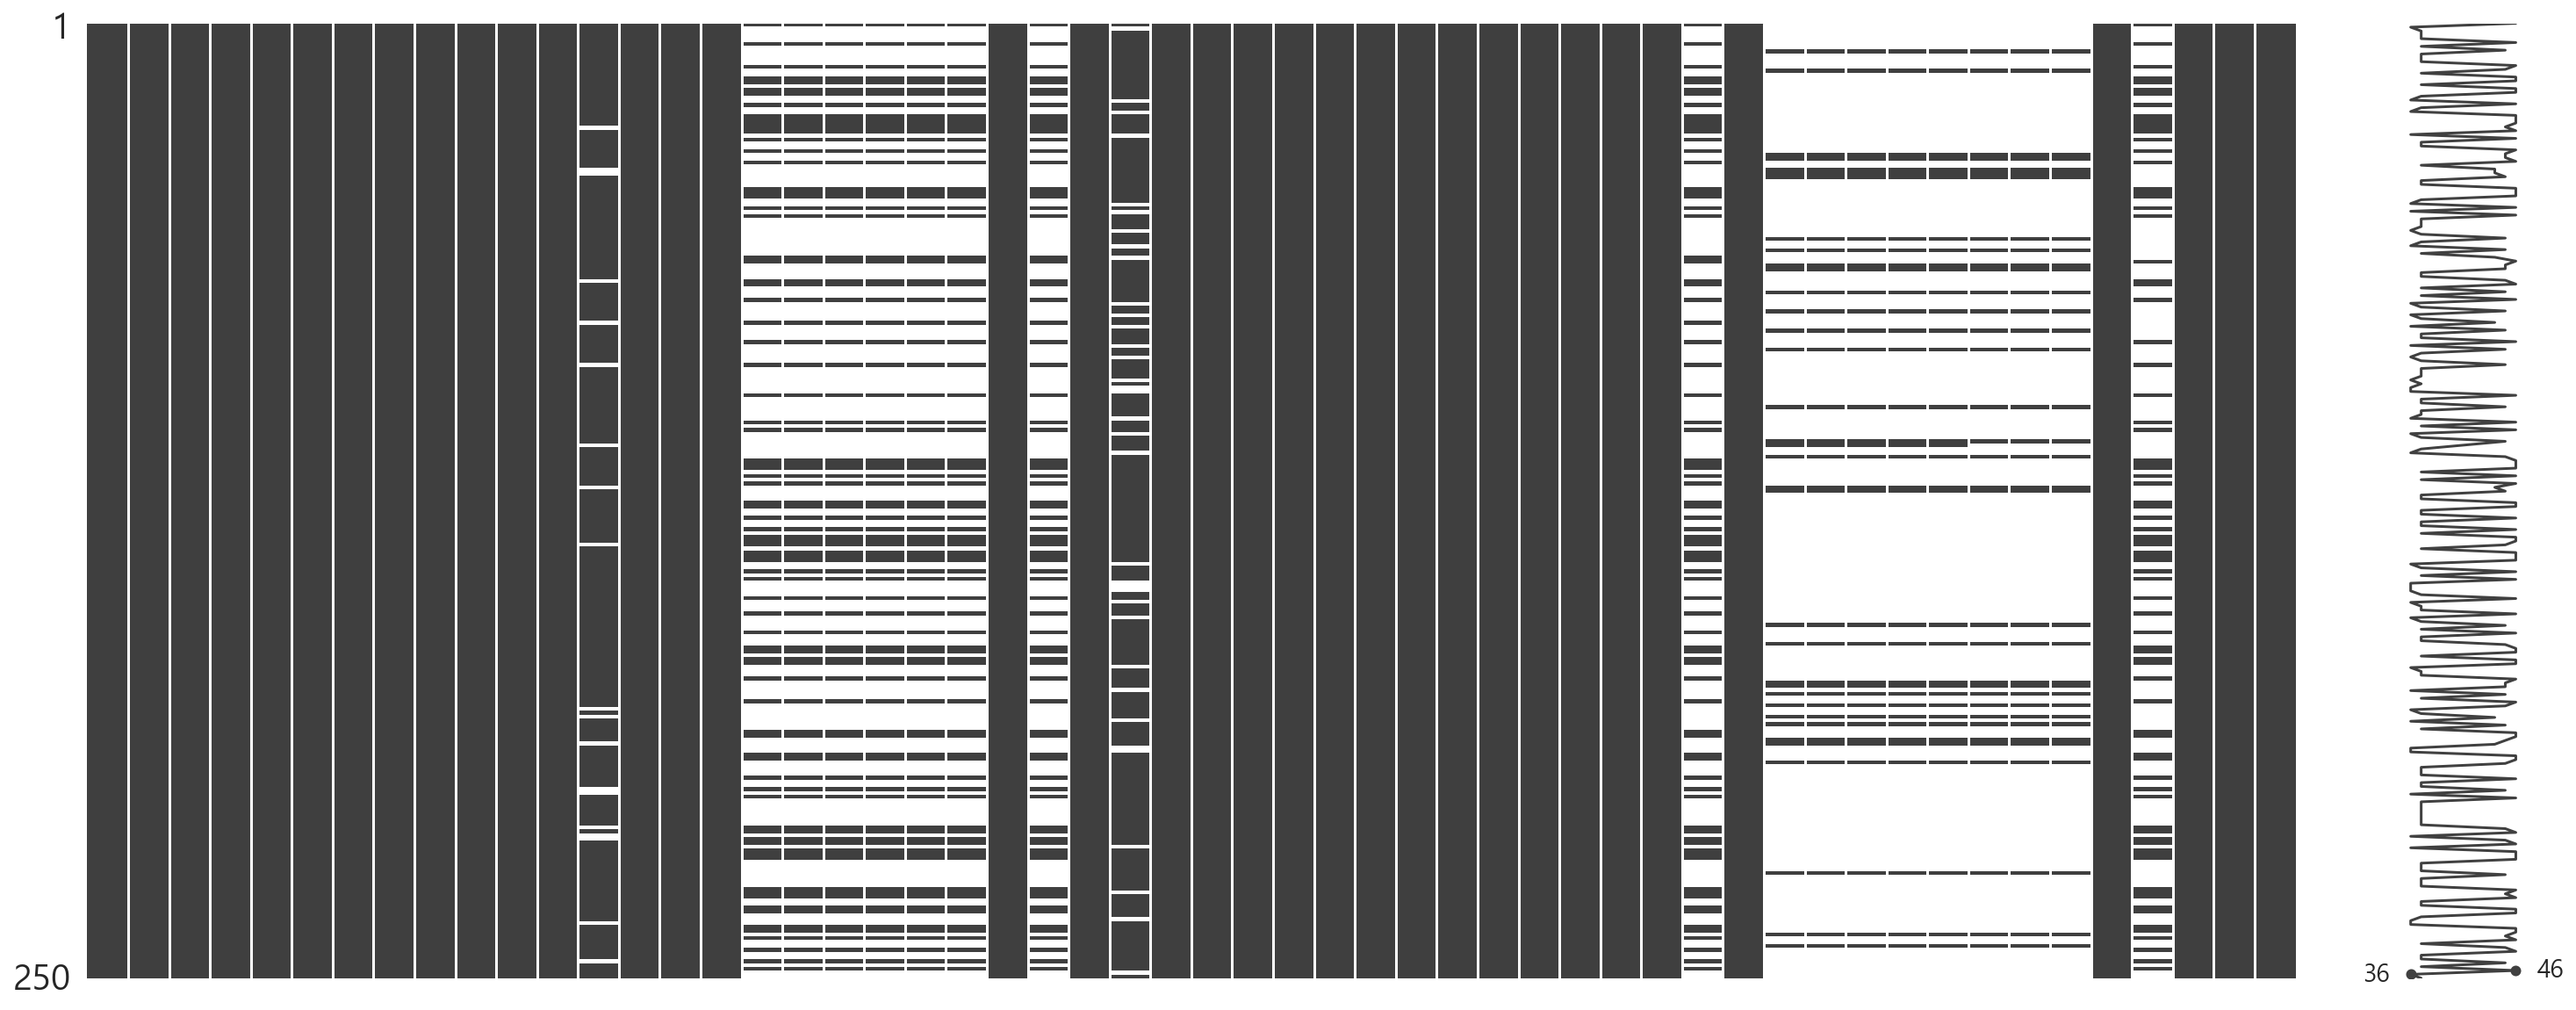

In [9]:
# 결측치 시각화 
plt.figure(figsize=(10,15))
msno.matrix(data.sample(250))
plt.show()

<AxesSubplot:>

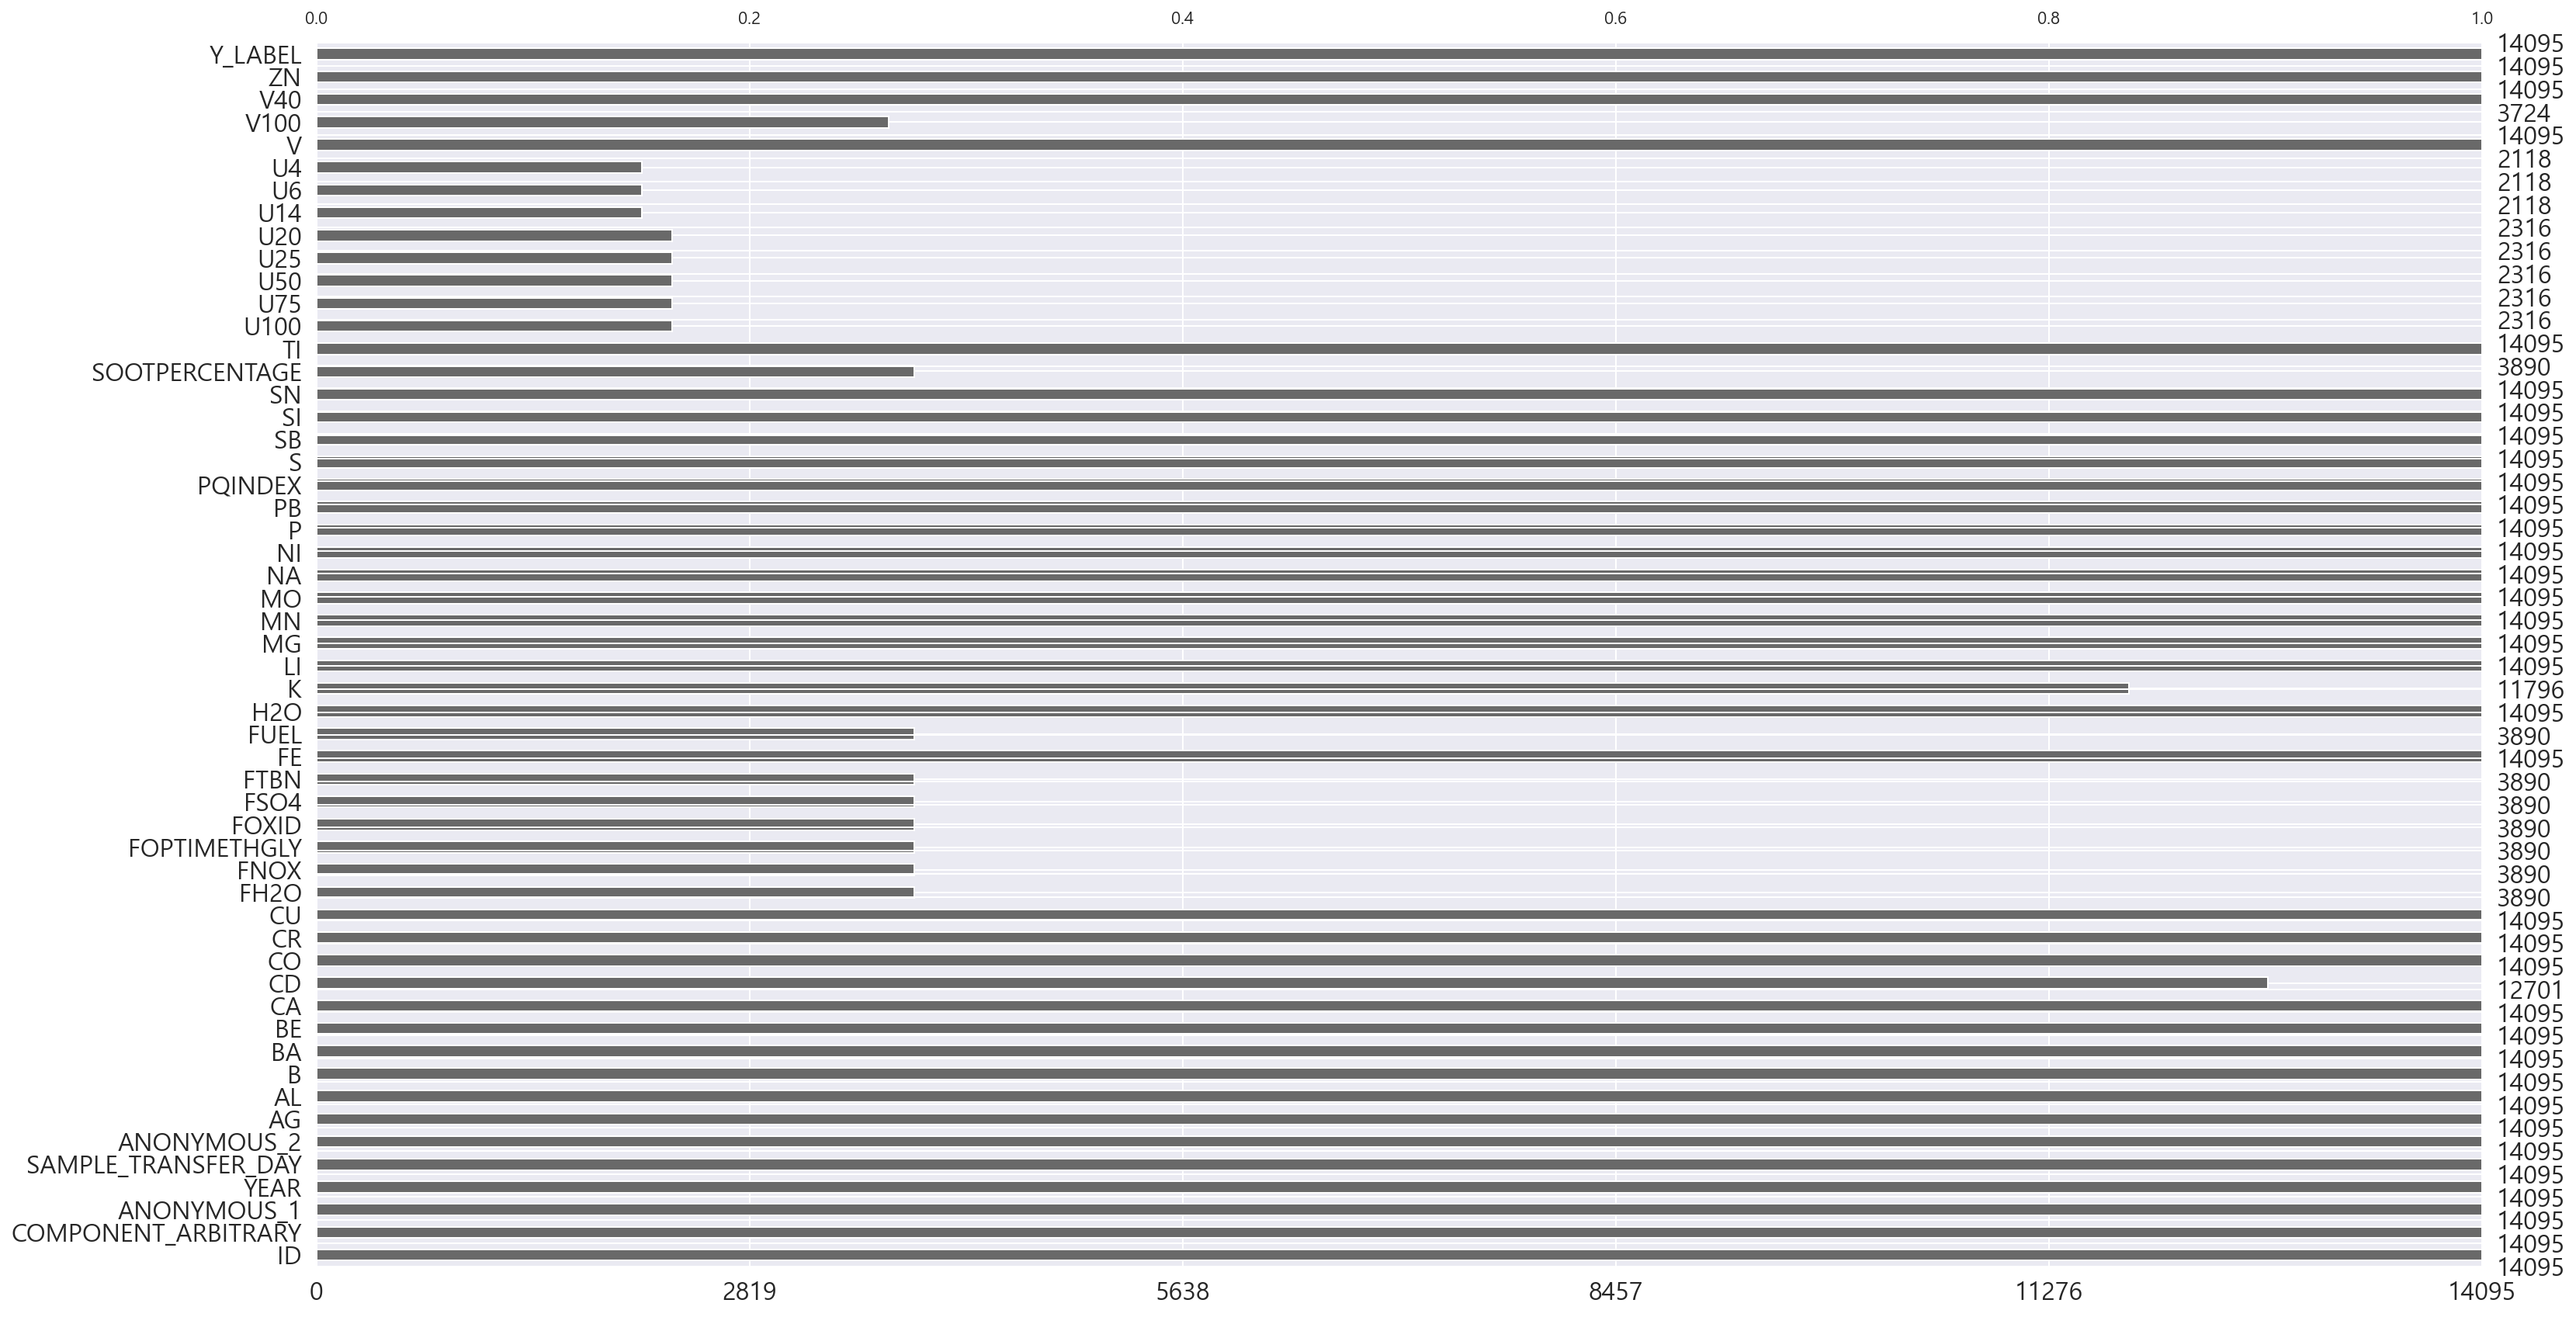

In [10]:
# bar
msno.bar(data)

<AxesSubplot:>

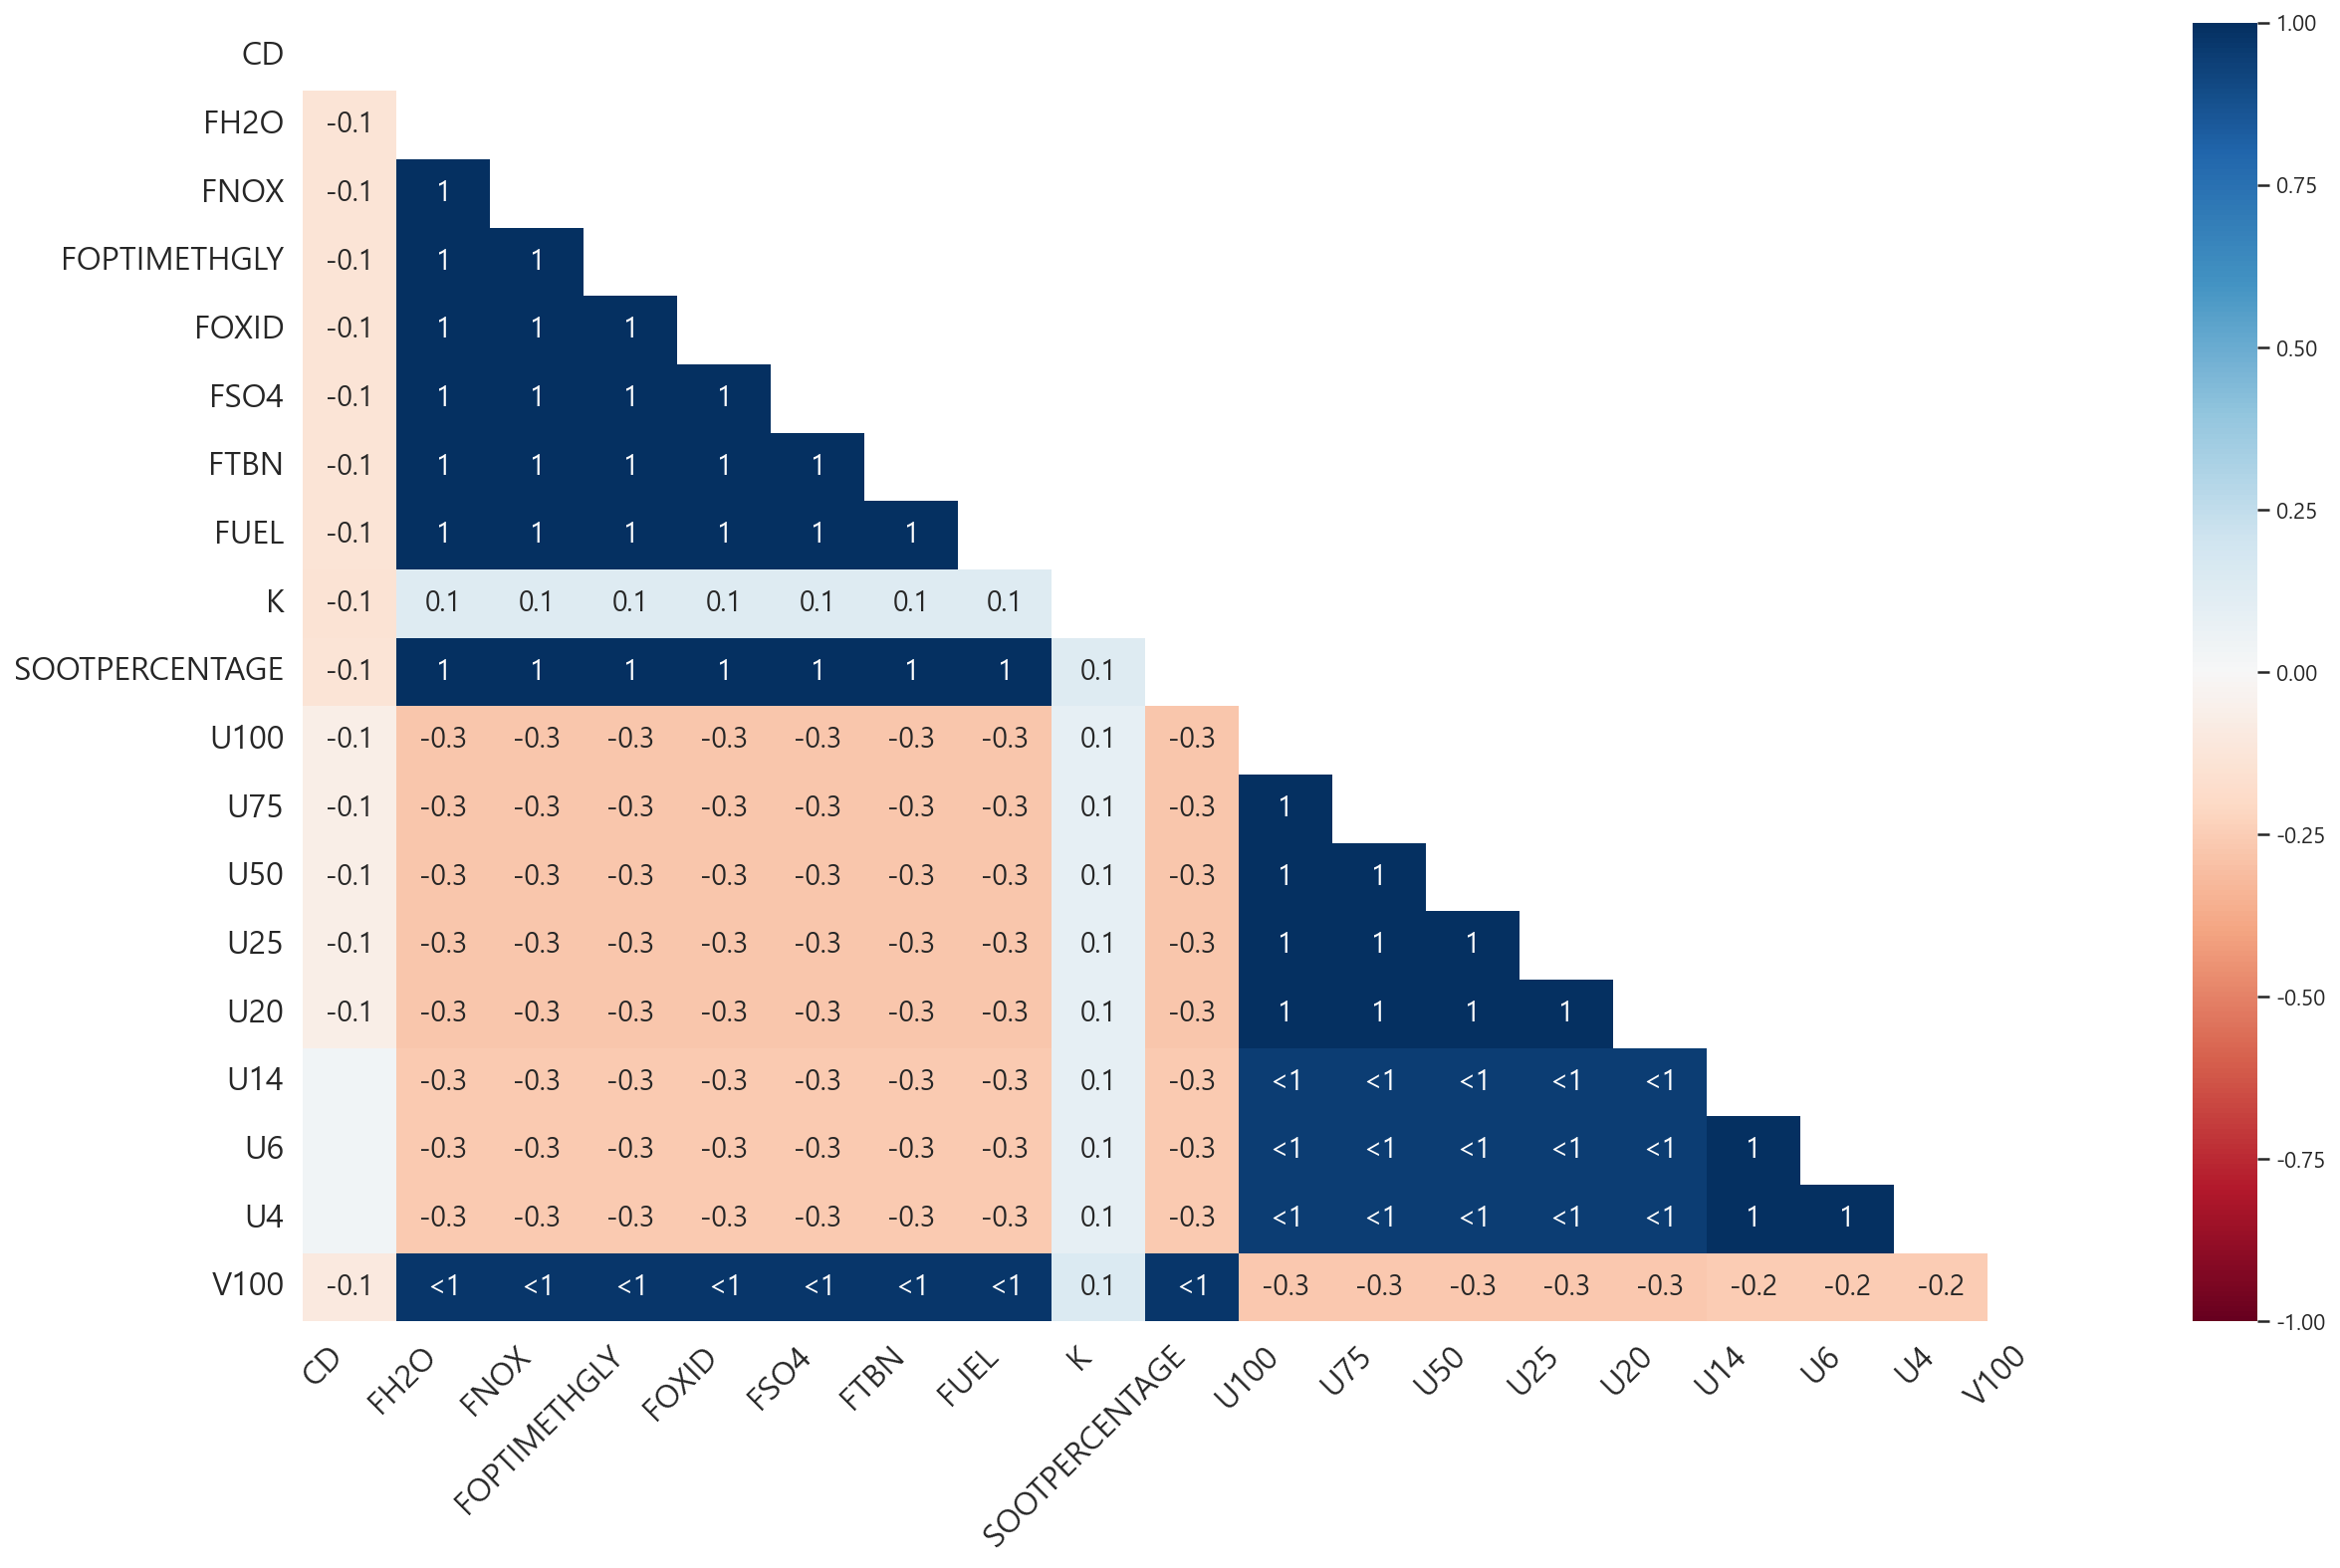

In [11]:
#한 변수의 유무가 다른 변수의 존재에 얼마나 강하게 영향을 미치는지입니다.
# 결측치가 너무 많아서 "1"로 뜬 것 같다. 
msno.heatmap(data)

# 결측치 확인 

In [12]:
# 'U20', 'U50', 'U100','U75', 'U25', 'FOPTIMETHGLY','V100' 삭제 
data = data.drop(columns = ['U20', 'U50', 'U100','U75', 'U25', 'FOPTIMETHGLY','V100'])

In [13]:
# Y_LABEL확인
data['Y_LABEL'].value_counts()

0    12892
1     1203
Name: Y_LABEL, dtype: int64

In [14]:
# 결측치 확인 
data.isna().sum()

ID                         0
COMPONENT_ARBITRARY        0
ANONYMOUS_1                0
YEAR                       0
SAMPLE_TRANSFER_DAY        0
ANONYMOUS_2                0
AG                         0
AL                         0
B                          0
BA                         0
BE                         0
CA                         0
CD                      1394
CO                         0
CR                         0
CU                         0
FH2O                   10205
FNOX                   10205
FOXID                  10205
FSO4                   10205
FTBN                   10205
FE                         0
FUEL                   10205
H2O                        0
K                       2299
LI                         0
MG                         0
MN                         0
MO                         0
NA                         0
NI                         0
P                          0
PB                         0
PQINDEX                    0
S             

In [15]:
# 결측치 "0"으로 채우기 
feature = ['K', 'CD','U4', 'U6', 'U14', 'FH2O','FOXID', 'FSO4', 'SOOTPERCENTAGE','FNOX','FUEL']
for i in feature:
    data[i].fillna(0, inplace=True)    

In [16]:
data['FUEL'].value_counts()

0.0     13808
1.0       111
1.5        40
2.0        28
2.5        23
4.0        18
3.5        15
3.0        14
4.5         7
12.0        6
6.5         6
5.5         4
8.0         3
5.0         3
7.0         2
6.0         2
11.0        1
8.5         1
0.5         1
9.0         1
11.5        1
Name: FUEL, dtype: int64

In [17]:
# 결측치 확인 --> 결측치 없음. * FUEL, FTBN은 아직 결측치 존재 . 
data.isna().sum()

ID                         0
COMPONENT_ARBITRARY        0
ANONYMOUS_1                0
YEAR                       0
SAMPLE_TRANSFER_DAY        0
ANONYMOUS_2                0
AG                         0
AL                         0
B                          0
BA                         0
BE                         0
CA                         0
CD                         0
CO                         0
CR                         0
CU                         0
FH2O                       0
FNOX                       0
FOXID                      0
FSO4                       0
FTBN                   10205
FE                         0
FUEL                       0
H2O                        0
K                          0
LI                         0
MG                         0
MN                         0
MO                         0
NA                         0
NI                         0
P                          0
PB                         0
PQINDEX                    0
S             

## FTBN

In [18]:
sns.boxplot(hi['FTBN'])
plt.show()

NameError: name 'hi' is not defined

In [ ]:
data.FTBN.plot()

In [ ]:
# 결측치를 뭘로 채우지?
data['FTBN'].describe()

In [ ]:
data['FTBN'].value_counts()

In [ ]:
data.head(3)

# YEAR, COMPONENT로 groupby 이용해 target값 분석. FUEL

In [ ]:
missing_value_mana = [ 'FUEL',   'FTBN']
for i in missing_value_mana:
    print(i, '\n' ,data[data[i].isna()==True]['Y_LABEL'].value_counts(), '\n-----------------------------')

In [ ]:
#pd.options.display.max_rows = 785
data.groupby('YEAR')['FTBN'].value_counts()

In [ ]:
data.groupby('YEAR')['Y_LABEL'].value_counts()

In [ ]:
data.groupby('YEAR')['FUEL'].value_counts()

# IterativeImputer

In [ ]:
FTBN = pd.DataFrame(data['FTBN'])
FTBN

In [ ]:
FTBN = pd.DataFrame(data['FTBN'])
FTBN
# 결측값을 예측을 통해 채워넣음 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(random_state=100)
FTBN_imputed = imputer.fit_transform(FTBN)

# describe()를 하기위해 dataframe으로 바꿔줌 
FTBN_imputed = pd.DataFrame(FTBN_imputed)
FTBN_imputed.describe()

In [ ]:
FTBN_imputed = pd.DataFrame(FTBN_imputed)
FTBN_imputed.describe()

In [ ]:
# iterative impute 하기 전.
data['FTBN'].describe()

# 결측치 많은 애들 heatmap

In [ ]:
hi.shape

In [ ]:
plt.figure(figsize = (35, 35))
sns.heatmap(hi.corr(), 
           annot = True, fmt = '0.1f',cmap = 'Blues')

# 70%이상인 결측치 제거 

In [ ]:
data = data.drop(columns=['U4', 'U6', 'U14', 'U20', 'U50', 'U100', 'U75', 'U25', 'V100', 'FH2O',
       'FOXID', 'FUEL', 'FOPTIMETHGLY', 'FSO4', 'FTBN', 'SOOTPERCENTAGE',
       'FNOX'])

In [ ]:
msno.heatmap(data)

# 상관관계 분석

In [ ]:
pd.options.display.max_columns = len(data.columns)

In [ ]:
data.shape

In [ ]:
corr = data.corr()
corr = corr.apply(lambda x: round(x, 2))
corr[abs(corr) > 0.5]

In [ ]:
plt.figure(figsize=(30,30))
sns.heatmap(corr, annot = True, cmap = 'Blues')

In [ ]:
# K랑 CD의 결측치를 채워야함. 
data.info()

In [ ]:
# 칼륨 
data['K'].describe()

In [ ]:
# 카드뮴 
data['CD'].describe()